In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


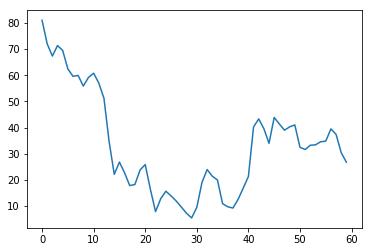

In [2]:
# weight = [13, 35, 26, 1, 1]
# weight = [52, 94, 87, 4, 1]
# weight = [25, 42, 38, 1, 1]
weight = [12, 37, 35, 3, 1]
# weight = [12, 41, 40, 1, 1]
# weight = [23, 29, 32, 1, 2]
datas = pd.read_csv('600031.csv')
seq = datas['BSI4'] * weight[0] + datas['openNR'] * weight[1] + datas['closeNR'] * weight[2] + datas['highNR'] * weight[3] + datas['lowNR'] * weight[4]
seqs = pd.DataFrame(seq)
seqs.columns = ['seq']
plt.plot(seqs)
plt.savefig('pic/600031_fin_BSI4_index')
plt.show()

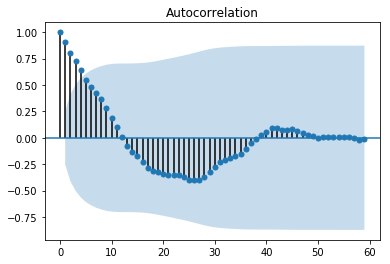

In [3]:
plot_acf(seqs).show()

In [4]:
print(u'原始序列的ADF结果：',ADF(seqs['seq']))

原始序列的ADF结果： (-2.1903743453948707, 0.20975754473511038, 1, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, 300.20457156925295)


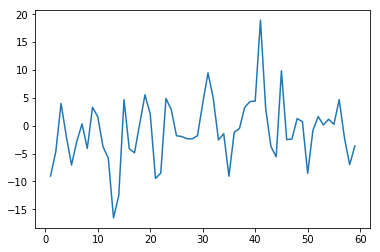

In [5]:
seqs_d = seqs.diff().dropna()
seqs_d.columns=['seq_d']
plt.plot(seqs_d)
plt.show()

差分序列的ADF结果： (-5.69525185970963, 7.901345587970432e-07, 1, 57, {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}, 300.8103615591132)
差分序列的白噪声检验结果： (array([5.12869416]), array([0.02353343]))


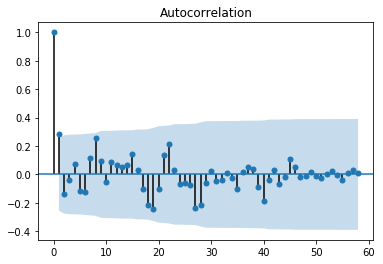

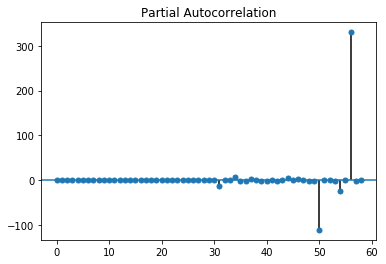

In [6]:
plot_acf(seqs_d).show()
plot_pacf(seqs_d).show()
print(u'差分序列的ADF结果：',ADF(seqs_d['seq_d']))
print(u'差分序列的白噪声检验结果：', acorr_ljungbox(seqs_d, lags=1))

In [7]:
seqs['seq'] = seqs['seq'].astype(float)
pmax = int(len(seqs_d) / 10)
qmax = int(len(seqs_d) / 10)
bic_matrix = []
for p in range(pmax + 1):
    tmp = []
    for q in range(qmax + 1):
        try:
            tmp.append(ARIMA(seqs, (p, 1, q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

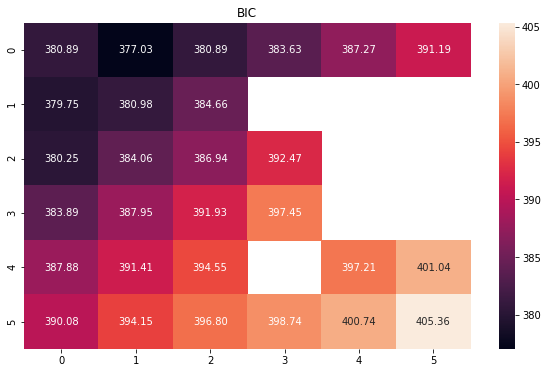

BIC最小的p值和q值：0,1


In [8]:
bic_matrix = pd.DataFrame(bic_matrix)
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(bic_matrix, mask = bic_matrix.isnull(), ax = ax, annot = True, fmt = '.2f')
ax.set_title('BIC')
plt.show()
p,q = bic_matrix.stack().idxmin()
print(u'BIC最小的p值和q值：%s,%s'%(p,q))

In [9]:
forecastnum = 5
model = ARIMA(seqs, (p,1,q)).fit()
summary = model.summary()
forecast = model.forecast(forecastnum)
print(summary)
print(forecast)

                             ARIMA Model Results                              
Dep. Variable:                  D.seq   No. Observations:                   59
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -182.397
Method:                       css-mle   S.D. of innovations              5.318
Date:                Sat, 23 Apr 2022   AIC                            370.793
Time:                        22:22:03   BIC                            377.026
Sample:                             1   HQIC                           373.226
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9646      0.968     -0.996      0.323      -2.862       0.933
ma.L1.D.seq     0.4056      0.117      3.466      0.001       0.176       0.635
                                    Roots       